In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [674]:
train = pd.read_csv(os.getcwd() + '/TRAIN.csv')
test = pd.read_csv(os.getcwd() + '/TEST_FINAL.csv')
sample = pd.read_csv(os.getcwd() + '/SAMPLE.csv')
train.shape, test.shape

((188340, 10), (22265, 8))

In [675]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [676]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [677]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [678]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [679]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


# Data Preprocessing

Removing entries where Sales is 0

In [573]:
#idx = train[train['Sales'] == 0].index
#train.drop(index = idx, inplace = True)

Removing outliers in Sales column

In [556]:
#values = train['Sales'].describe()
#IQR = values['75%'] - values['25%']
#lower_range  = values['25%'] - IQR*1.5
#upper_range = values['75%'] + IQR*1.5
#out_idx = train[train['Sales'] > upper_range].index
#train = train.drop(index = out_idx)

In [680]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


Splitting Date columns into day, month and year

In [681]:
train['Day'] = pd.to_datetime(train['Date'], format = '%Y-%m-%d').dt.day
train['Month'] = pd.to_datetime(train['Date'], format = '%Y-%m-%d').dt.month
train['Year'] = pd.to_datetime(train['Date'], format = '%Y-%m-%d').dt.year

In [682]:
test['Day'] = pd.to_datetime(test['Date'], format = '%Y-%m-%d').dt.day
test['Month'] = pd.to_datetime(test['Date'], format = '%Y-%m-%d').dt.month
test['Year'] = pd.to_datetime(test['Date'], format = '%Y-%m-%d').dt.year

Label Encoding Categorical values

In [683]:
cat_columns = list(train.select_dtypes(include = ['object']).columns)

In [684]:
cat_columns.remove('ID')
cat_columns.remove('Date')

In [685]:
for val in cat_columns:
    print(train[val].value_counts(), '/n')

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64 /n
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64 /n
R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64 /n
No     104051
Yes     84289
Name: Discount, dtype: int64 /n


In [686]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [687]:
train.iloc[:,2] = LE.fit_transform(train.iloc[:,2])
train.iloc[:,3] = LE.fit_transform(train.iloc[:,3])
train.iloc[:,4] = LE.fit_transform(train.iloc[:,4])
train.iloc[:,7] = LE.fit_transform(train.iloc[:,7])

In [688]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  int64  
 3   Location_Type  188340 non-null  int64  
 4   Region_Code    188340 non-null  int64  
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  int64  
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
 10  Day            188340 non-null  int64  
 11  Month          188340 non-null  int64  
 12  Year           188340 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 18.7+ MB


# Correlation Matrix

In [689]:
corr = train.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Day,Month,Year
Store_id,1.000000,0.086272,0.067296,-0.125293,0.000000,-0.000693,0.028290,0.004377,-0.000000,-0.000000,0.000000
Store_Type,0.086272,1.000000,-0.100912,-0.243884,0.000000,0.002121,0.583800,0.492471,0.000000,0.000000,0.000000
Location_Type,0.067296,-0.100912,1.000000,-0.071980,-0.000000,0.000419,-0.248567,-0.283771,0.000000,0.000000,-0.000000
Region_Code,-0.125293,-0.243884,-0.071980,1.000000,-0.000000,0.000147,-0.235614,-0.121003,-0.000000,-0.000000,0.000000
Holiday,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.019545,-0.140496,-0.154779,0.013668,0.013705,0.013862
Discount,-0.000693,0.002121,0.000419,0.000147,0.019545,1.000000,0.233374,0.323906,-0.078136,0.013692,-0.030064
#Order,0.028290,0.583800,-0.248567,-0.235614,-0.140496,0.233374,1.000000,0.941601,-0.017951,-0.002864,0.022860
Sales,0.004377,0.492471,-0.283771,-0.121003,-0.154779,0.323906,0.941601,1.000000,-0.038969,-0.018092,0.018284
Day,-0.000000,0.000000,0.000000,-0.000000,0.013668,-0.078136,-0.017951,-0.038969,1.000000,0.012734,-0.005078
Month,-0.000000,0.000000,0.000000,-0.000000,0.013705,0.013692,-0.002864,-0.018092,0.012734,1.000000,-0.470142


In [690]:
col = ['Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Day', 'Month', 'Year']

In [691]:
import seaborn as sns

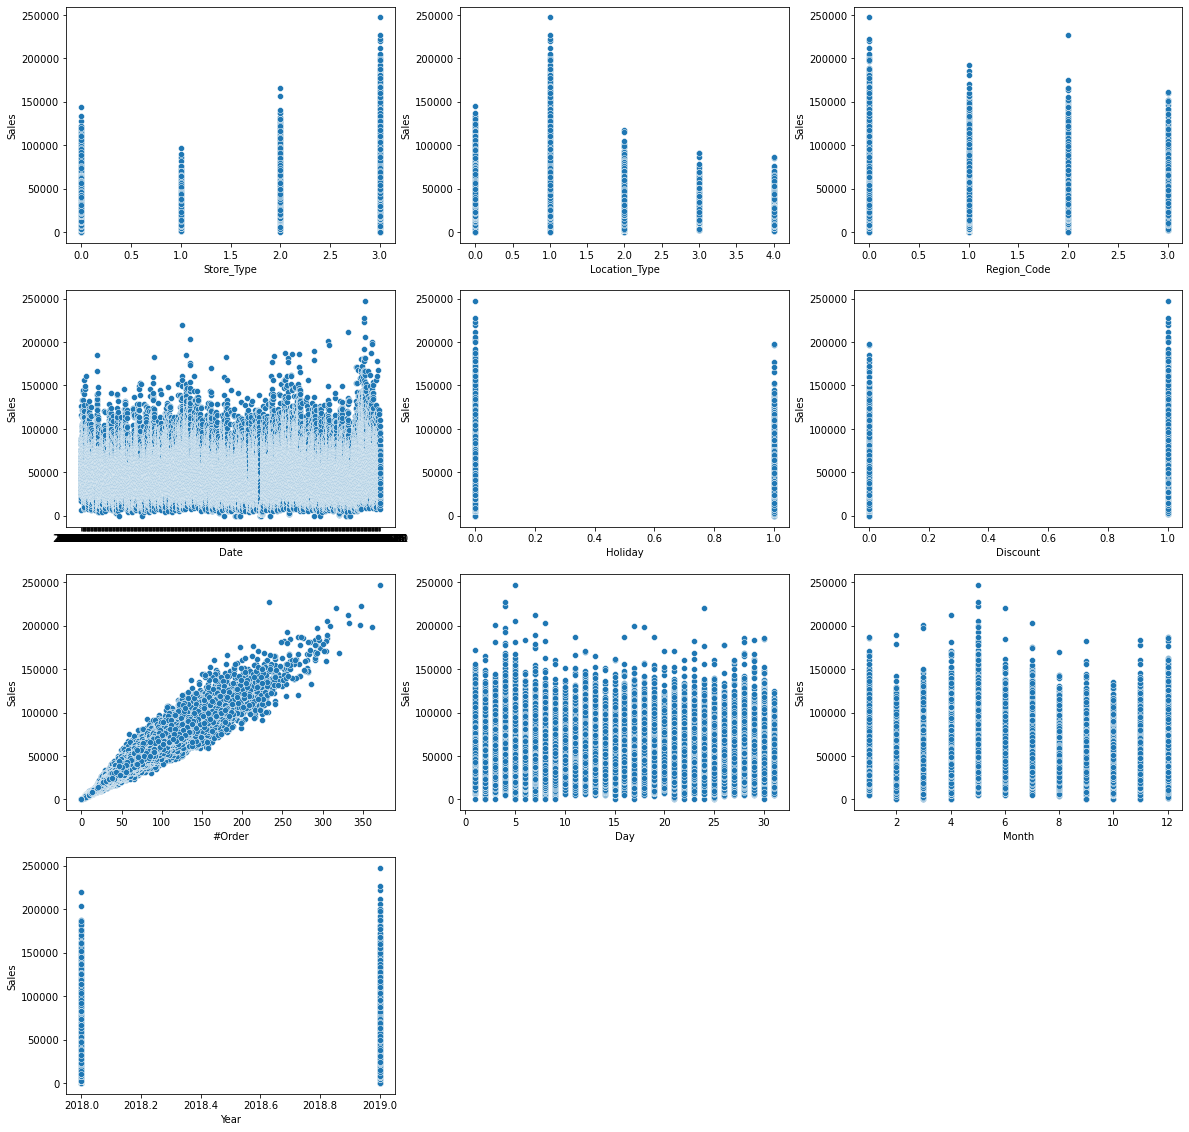

In [692]:
plt.figure(figsize = (20,20))
for i in range(len(col)):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x = train[col[i]], y = train['Sales'])
plt.show()

# Transforming Data

In [693]:
from scipy import stats

In [694]:
#train['Sales_boxcox'], params = stats.boxcox(train['Sales'])

In [695]:
#train['Sales_log'] = np.log(train['Sales'] + 1)

In [696]:
train.skew()

Store_id         0.000000
Store_Type       0.472378
Location_Type    1.065123
Region_Code      0.374840
Holiday          2.177176
Discount         0.211021
#Order           1.372874
Sales            1.248819
Day              0.009455
Month            0.444653
Year             0.911554
dtype: float64

# Model Training 

In [698]:
X = train.drop(['ID', 'Store_id', 'Date', '#Order' ,'Sales', 'Day','Month','Year'], axis = 1)
Y = train['Sales']

In [699]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1 = StandardScaler()

In [446]:
#X = scaler1.fit_transform(X)

Train Test split

In [700]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 21)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((150672, 5), (37668, 5), (150672,), (37668,))

In [701]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
LR = LinearRegression()
RF = RandomForestRegressor(n_estimators = 250, min_samples_leaf = 15)
GB = GradientBoostingRegressor()
AB = AdaBoostRegressor()
XGB = xgb.XGBRegressor()
LGB = lgb.LGBMRegressor()
CB = CatBoostRegressor()

In [702]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
import math

In [703]:
LR.fit(xTrain, yTrain)
pred_LR = LR.predict(xTest)
print('MAE: ',mean_absolute_error(yTest, pred_LR), '\nRMSE: ',math.sqrt(mean_squared_error(yTest, pred_LR)),
                  '\nR2: ',r2_score(yTest, pred_LR), '\nMSLE',mean_squared_log_error(yTest, pred_LR))

MAE:  9971.288822097737 
RMSE:  13762.739249593638 
R2:  0.4346213712587823 
MSLE 0.13839006168018272


In [704]:
RF.fit(xTrain, yTrain)
pred_RF = RF.predict(xTest)
print('MAE: ',mean_absolute_error(yTest, pred_RF), '\nRMSE: ',math.sqrt(mean_squared_error(yTest, pred_RF)),
                  '\nR2: ',r2_score(yTest, pred_RF), '\nMSLE',mean_squared_log_error(yTest, pred_RF))

MAE:  8323.338311649808 
RMSE:  11928.74924691634 
R2:  0.5752636373896292 
MSLE 0.11130856532842295


In [705]:
XGB.fit(xTrain, yTrain)
pred_XGB = XGB.predict(xTest)
print('MAE: ',mean_absolute_error(yTest, pred_XGB), '\nRMSE: ',math.sqrt(mean_squared_error(yTest, pred_XGB)),
                  '\nR2: ',r2_score(yTest, pred_XGB), '\nMSLE',mean_squared_log_error(yTest, pred_XGB))

MAE:  8323.083516228546 
RMSE:  11928.56989129959 
R2:  0.5752764096053911 
MSLE 0.11130569718497106


In [706]:
LGB.fit(xTrain, yTrain)
pred_LGB = LGB.predict(xTest)
print('MAE: ',mean_absolute_error(yTest, pred_LGB), '\nRMSE: ',math.sqrt(mean_squared_error(yTest, pred_LGB)),
                  '\nR2: ',r2_score(yTest, pred_LGB), '\nMSLE',mean_squared_log_error(yTest, pred_LGB))

MAE:  8321.293712047418 
RMSE:  11927.47916922757 
R2:  0.5753540776275006 
MSLE 0.11129155787367154


In [707]:
AB.fit(xTrain, yTrain)
pred_AB = AB.predict(xTest)
print('MAE: ',mean_absolute_error(yTest, pred_AB), '\nRMSE: ',math.sqrt(mean_squared_error(yTest, pred_AB)),
                  '\nR2: ',r2_score(yTest, pred_AB), '\nMSLE',mean_squared_log_error(yTest, pred_AB))

MAE:  9759.934519314544 
RMSE:  13477.975789326036 
R2:  0.4577757103605906 
MSLE 0.13983699551033668


In [708]:
CB.fit(xTrain, yTrain)
pred_CB = CB.predict(xTest)

Learning rate set to 0.095299
0:	learn: 17559.4620730	total: 10.8ms	remaining: 10.8s
1:	learn: 16755.0949888	total: 17.1ms	remaining: 8.53s
2:	learn: 16066.7223606	total: 22.4ms	remaining: 7.46s
3:	learn: 15488.4815453	total: 29.2ms	remaining: 7.28s
4:	learn: 14982.6597658	total: 35.2ms	remaining: 7s
5:	learn: 14559.3863332	total: 41.8ms	remaining: 6.92s
6:	learn: 14192.5288158	total: 48.7ms	remaining: 6.91s
7:	learn: 13879.8504565	total: 55.1ms	remaining: 6.83s
8:	learn: 13624.0198322	total: 61.3ms	remaining: 6.75s
9:	learn: 13408.7503779	total: 67.7ms	remaining: 6.71s
10:	learn: 13226.4728685	total: 74.3ms	remaining: 6.68s
11:	learn: 13066.2679094	total: 81.8ms	remaining: 6.74s
12:	learn: 12932.3714219	total: 88.2ms	remaining: 6.7s
13:	learn: 12819.8620785	total: 94.5ms	remaining: 6.66s
14:	learn: 12728.6628961	total: 101ms	remaining: 6.63s
15:	learn: 12651.6683732	total: 107ms	remaining: 6.59s
16:	learn: 12580.1259156	total: 113ms	remaining: 6.56s
17:	learn: 12519.4450624	total: 120

148:	learn: 12158.5050167	total: 955ms	remaining: 5.45s
149:	learn: 12158.4183130	total: 961ms	remaining: 5.45s
150:	learn: 12158.3127877	total: 968ms	remaining: 5.44s
151:	learn: 12158.2406897	total: 976ms	remaining: 5.44s
152:	learn: 12158.1471409	total: 982ms	remaining: 5.43s
153:	learn: 12158.1016952	total: 988ms	remaining: 5.43s
154:	learn: 12157.9398612	total: 994ms	remaining: 5.42s
155:	learn: 12157.8686584	total: 1s	remaining: 5.41s
156:	learn: 12157.8204313	total: 1.01s	remaining: 5.41s
157:	learn: 12157.7813576	total: 1.01s	remaining: 5.4s
158:	learn: 12157.7304001	total: 1.02s	remaining: 5.39s
159:	learn: 12157.6517646	total: 1.03s	remaining: 5.39s
160:	learn: 12157.5815775	total: 1.03s	remaining: 5.38s
161:	learn: 12157.5260247	total: 1.04s	remaining: 5.38s
162:	learn: 12157.4931739	total: 1.05s	remaining: 5.37s
163:	learn: 12157.4588535	total: 1.05s	remaining: 5.37s
164:	learn: 12157.3834001	total: 1.06s	remaining: 5.36s
165:	learn: 12157.3380728	total: 1.06s	remaining: 5.

296:	learn: 12154.8273793	total: 1.94s	remaining: 4.59s
297:	learn: 12154.8206819	total: 1.95s	remaining: 4.59s
298:	learn: 12154.8077303	total: 1.96s	remaining: 4.59s
299:	learn: 12154.8040988	total: 1.96s	remaining: 4.58s
300:	learn: 12154.8018521	total: 1.97s	remaining: 4.58s
301:	learn: 12154.7933963	total: 1.98s	remaining: 4.57s
302:	learn: 12154.7806164	total: 1.98s	remaining: 4.56s
303:	learn: 12154.7782471	total: 1.99s	remaining: 4.56s
304:	learn: 12154.7761124	total: 2s	remaining: 4.55s
305:	learn: 12154.7742771	total: 2s	remaining: 4.55s
306:	learn: 12154.7493482	total: 2.01s	remaining: 4.54s
307:	learn: 12154.7289186	total: 2.02s	remaining: 4.53s
308:	learn: 12154.7263393	total: 2.02s	remaining: 4.53s
309:	learn: 12154.7246556	total: 2.03s	remaining: 4.52s
310:	learn: 12154.7200785	total: 2.04s	remaining: 4.51s
311:	learn: 12154.7099479	total: 2.04s	remaining: 4.51s
312:	learn: 12154.7074368	total: 2.05s	remaining: 4.5s
313:	learn: 12154.6979217	total: 2.06s	remaining: 4.5s


458:	learn: 12154.3025790	total: 3.13s	remaining: 3.69s
459:	learn: 12154.3021856	total: 3.14s	remaining: 3.69s
460:	learn: 12154.2960438	total: 3.15s	remaining: 3.68s
461:	learn: 12154.2958319	total: 3.16s	remaining: 3.67s
462:	learn: 12154.2942328	total: 3.16s	remaining: 3.67s
463:	learn: 12154.2937937	total: 3.17s	remaining: 3.66s
464:	learn: 12154.2920425	total: 3.18s	remaining: 3.66s
465:	learn: 12154.2907248	total: 3.18s	remaining: 3.65s
466:	learn: 12154.2890839	total: 3.19s	remaining: 3.64s
467:	learn: 12154.2885645	total: 3.2s	remaining: 3.63s
468:	learn: 12154.2882784	total: 3.21s	remaining: 3.63s
469:	learn: 12154.2880064	total: 3.21s	remaining: 3.62s
470:	learn: 12154.2871886	total: 3.22s	remaining: 3.61s
471:	learn: 12154.2865173	total: 3.23s	remaining: 3.61s
472:	learn: 12154.2857794	total: 3.23s	remaining: 3.6s
473:	learn: 12154.2846328	total: 3.24s	remaining: 3.59s
474:	learn: 12154.2834031	total: 3.25s	remaining: 3.59s
475:	learn: 12154.2823433	total: 3.25s	remaining: 

607:	learn: 12154.1864796	total: 4.13s	remaining: 2.66s
608:	learn: 12154.1862960	total: 4.14s	remaining: 2.66s
609:	learn: 12154.1851714	total: 4.14s	remaining: 2.65s
610:	learn: 12154.1831983	total: 4.15s	remaining: 2.64s
611:	learn: 12154.1822855	total: 4.16s	remaining: 2.63s
612:	learn: 12154.1820238	total: 4.16s	remaining: 2.63s
613:	learn: 12154.1815486	total: 4.17s	remaining: 2.62s
614:	learn: 12154.1810427	total: 4.18s	remaining: 2.61s
615:	learn: 12154.1808819	total: 4.18s	remaining: 2.61s
616:	learn: 12154.1808523	total: 4.19s	remaining: 2.6s
617:	learn: 12154.1806537	total: 4.2s	remaining: 2.59s
618:	learn: 12154.1779751	total: 4.2s	remaining: 2.59s
619:	learn: 12154.1778705	total: 4.21s	remaining: 2.58s
620:	learn: 12154.1772957	total: 4.21s	remaining: 2.57s
621:	learn: 12154.1761637	total: 4.22s	remaining: 2.56s
622:	learn: 12154.1754370	total: 4.23s	remaining: 2.56s
623:	learn: 12154.1754027	total: 4.23s	remaining: 2.55s
624:	learn: 12154.1738939	total: 4.24s	remaining: 2

765:	learn: 12154.1260623	total: 5.12s	remaining: 1.56s
766:	learn: 12154.1260157	total: 5.13s	remaining: 1.56s
767:	learn: 12154.1259785	total: 5.13s	remaining: 1.55s
768:	learn: 12154.1258266	total: 5.14s	remaining: 1.54s
769:	learn: 12154.1255716	total: 5.15s	remaining: 1.54s
770:	learn: 12154.1254499	total: 5.15s	remaining: 1.53s
771:	learn: 12154.1253550	total: 5.16s	remaining: 1.52s
772:	learn: 12154.1250024	total: 5.17s	remaining: 1.52s
773:	learn: 12154.1249576	total: 5.17s	remaining: 1.51s
774:	learn: 12154.1235928	total: 5.18s	remaining: 1.5s
775:	learn: 12154.1235290	total: 5.18s	remaining: 1.5s
776:	learn: 12154.1234481	total: 5.19s	remaining: 1.49s
777:	learn: 12154.1229689	total: 5.2s	remaining: 1.48s
778:	learn: 12154.1222338	total: 5.2s	remaining: 1.48s
779:	learn: 12154.1219086	total: 5.21s	remaining: 1.47s
780:	learn: 12154.1218264	total: 5.21s	remaining: 1.46s
781:	learn: 12154.1217521	total: 5.22s	remaining: 1.46s
782:	learn: 12154.1217327	total: 5.23s	remaining: 1.

923:	learn: 12154.0952297	total: 6.11s	remaining: 502ms
924:	learn: 12154.0952231	total: 6.12s	remaining: 496ms
925:	learn: 12154.0947902	total: 6.12s	remaining: 489ms
926:	learn: 12154.0947741	total: 6.13s	remaining: 483ms
927:	learn: 12154.0943740	total: 6.13s	remaining: 476ms
928:	learn: 12154.0940255	total: 6.14s	remaining: 469ms
929:	learn: 12154.0940199	total: 6.15s	remaining: 463ms
930:	learn: 12154.0939774	total: 6.15s	remaining: 456ms
931:	learn: 12154.0939287	total: 6.16s	remaining: 450ms
932:	learn: 12154.0938744	total: 6.17s	remaining: 443ms
933:	learn: 12154.0930983	total: 6.17s	remaining: 436ms
934:	learn: 12154.0930748	total: 6.18s	remaining: 430ms
935:	learn: 12154.0930365	total: 6.18s	remaining: 423ms
936:	learn: 12154.0930092	total: 6.19s	remaining: 416ms
937:	learn: 12154.0930031	total: 6.2s	remaining: 410ms
938:	learn: 12154.0929152	total: 6.21s	remaining: 403ms
939:	learn: 12154.0928196	total: 6.21s	remaining: 396ms
940:	learn: 12154.0928032	total: 6.22s	remaining:

In [709]:
print('MAE: ',mean_absolute_error(yTest, pred_CB), '\nRMSE: ',math.sqrt(mean_squared_error(yTest, pred_CB)),
                  '\nR2: ',r2_score(yTest, pred_CB), '\nMSLE',mean_squared_log_error(yTest, pred_CB))

MAE:  8323.209459720127 
RMSE:  11928.636059925157 
R2:  0.5752716976483965 
MSLE 0.11130329164379991


# Test Prediction

In [710]:
test_X = test.drop(['ID', 'Date', 'Store_id','Day','Month','Year'], axis = 1)

In [711]:
test_X.iloc[:,0] = LE.fit_transform(test_X.iloc[:,0])
test_X.iloc[:,1] = LE.fit_transform(test_X.iloc[:,1])
test_X.iloc[:,2] = LE.fit_transform(test_X.iloc[:,2])
test_X.iloc[:,4] = LE.fit_transform(test_X.iloc[:,4])

In [712]:
test_X

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,3,1,2,0,0
1,0,0,0,0,0
2,3,1,0,0,0
3,0,0,3,0,0
4,0,0,1,0,0
...,...,...,...,...,...
22260,1,4,1,0,0
22261,3,1,0,0,0
22262,0,0,2,0,1
22263,0,0,3,0,0


In [713]:
#test_X = scaler1.fit_transform(test_X)

In [714]:
predf = LGB.predict(test_X)

In [715]:
predf

array([51977.37849416, 33589.79145283, 60995.74736345, ...,
       48118.89547465, 35297.89264074, 28839.81318073])

In [608]:
from scipy.special import inv_boxcox

In [672]:
#pred = inv_boxcox(predf, params)

In [669]:
#pred_log = np.exp(predf) - 1

In [716]:
submission4 = pd.DataFrame({'ID' : test['ID'], 'Sales' : predf})

In [717]:
submission4.to_csv('my_submission4.csv', index = False)